# Importing Pandas

In [1]:
import pandas as pd

# Reading CSV files

In [2]:
df = pd.read_csv("people.csv")

In [3]:
df.head()

,ID,Name,Affiliations
0,P8041475,William Edward Acraman,BCC:GWR
1,Pe822a27,William Bruce Adair,
2,P5a180b0,Thomas Kington Bayly,
3,P4fe27a3,Thomas Baynton,
4,P1592273,Robert Bright,BCC:GWR


In [4]:
df.tail()

,ID,Name,Affiliations
70,P57b2427,George Rennie,
71,P8d92578,Francis Petit Smith,
72,P6b95eb4,Mr. Smith,
73,P2ac1cdd,Mr. Stedder,GWR
74,Pef9ff39,Robert Stepehnson,GWR


In [5]:
df["ID"]

0     P8041475
1     Pe822a27
2     P5a180b0
3     P4fe27a3
4     P1592273
        ...   
70    P57b2427
71    P8d92578
72    P6b95eb4
73    P2ac1cdd
74    Pef9ff39
Name: ID, Length: 75, dtype: object

In [6]:
df.loc[0:3]

,ID,Name,Affiliations
0,P8041475,William Edward Acraman,BCC:GWR
1,Pe822a27,William Bruce Adair,
2,P5a180b0,Thomas Kington Bayly,
3,P4fe27a3,Thomas Baynton,


In [7]:
df.loc[0]

ID                             P8041475
Name             William Edward Acraman
Affiliations                    BCC:GWR
Name: 0, dtype: object

In [8]:
df.loc[0, "ID"]

'P8041475'

In [9]:
df.loc[0, ["ID", "Name"]]

ID                     P8041475
Name     William Edward Acraman
Name: 0, dtype: object

In [10]:
df.loc[0]["ID"]

'P8041475'

In [11]:
df["ID"].loc[0]

'P8041475'

# Selecting by Searching

In [12]:
df[ df["ID"] == "P5a180b0" ]

,ID,Name,Affiliations
2,P5a180b0,Thomas Kington Bayly,


In [13]:
df[ df["Name"].str.contains("Brunel") ]

,ID,Name,Affiliations
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR


In [14]:
df[ df["Name"].str.contains("brunel", case=False) ]

,ID,Name,Affiliations
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR


In [15]:
df[ df["Name"].str.contains("claxton", case=False) ]

,ID,Name,Affiliations
10,P31a70ec,Christopher Claxton,BDC
11,P4ddfbf9,William Claxton,SMV


In [16]:
df[ df["Name"].str.contains("claxton", case=False) ].loc[10]

ID                          P31a70ec
Name             Christopher Claxton
Affiliations                     BDC
Name: 10, dtype: object

In [17]:
df[ df["Name"].str.contains("claxton", case=False) ].iloc[0]

ID                          P31a70ec
Name             Christopher Claxton
Affiliations                     BDC
Name: 10, dtype: object

In [18]:
df[ df["Name"].str.contains(r"chris.*clax", case=False) ]

,ID,Name,Affiliations
10,P31a70ec,Christopher Claxton,BDC


In [19]:
df[ df["Name"].str.endswith("nel") ]

,ID,Name,Affiliations
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR


# Fixing Data

In [20]:
df[ df["Name"].str.startswith("Isam") ]

,ID,Name,Affiliations


In [21]:
df[ df["Name"].str.startswith(" Isam") ]

,ID,Name,Affiliations
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR


In [22]:
df = pd.read_csv("people.csv", skipinitialspace=True)

In [23]:
df[ df["Name"].str.startswith("Isam") ]

,ID,Name,Affiliations
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR


# Joining Data

In [24]:
bios = pd.read_csv("biographies.tsv", sep="\t", skipinitialspace=True)

In [25]:
df = pd.merge(df, bios, on="ID")

In [26]:
df.head()

,ID,Name,Affiliations,Biography
0,P8041475,William Edward Acraman,BCC:GWR,"William Edward Acraman. Bristol iron-monger, ..."
1,Pe822a27,William Bruce Adair,NaN,William Bruce Adair. Shareholder in the Great...
2,P5a180b0,Thomas Kington Bayly,NaN,Thomas Kington Bayly. Business Partner and ne...
3,P4fe27a3,Thomas Baynton,NaN,Thomas Baynton. Shareholder in the Great Weste...
4,P1592273,Robert Bright,BCC:GWR,Robert Bright. Member of Bristol merchant fam...


In [27]:
df[ df["Biography"].str.contains("propeller", case=False) ]

,ID,Name,Affiliations,Biography
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR,Isambard Kingdom Brunel. Consulting engineer ...
44,Paf80292,William Symonds,RN,William Symonds. Surveyor of the Royal Navy f...
52,Pfc20d19,John Barnes,NaN,John Barnes. Mechanical engineer who built ste...
56,Pa41a6fd,Captain Ed R. N. Chappel,RN,Captain Chappel. Controller of Channel Packet...
64,P22dfb4d,John Laird,NaN,John Laird. Pioneering iron ship builder base...
68,P57b2427,George Rennie,NaN,George Rennie. London-based mechanical engine...
69,P8d92578,Francis Petit Smith,NaN,Francis Petit Smith. Original patentee of succ...


In [28]:
for row in df[ df["Biography"].str.contains("propeller", case=False) ].values:
    print(row)

['Pbb00e87' 'Isambard Kingdom Brunel' 'BDC:GWR'
 "Isambard Kingdom Brunel.  Consulting engineer for the Bristol Dock Company. Chief engineer of the Great Western Railway and other southern branch lines.  Managing consultant for the Great Western Steamship. Consulting engineer for the Great Britain Steamship.  Investor in both Great Western Railway and Great Western Steamship. Co.  Provided critical connection to, and super-intedenace of, Joshua Field's marine engineering work in the Great Western.  Persuaded Great Western Steamship Company to adopt screw propeller in the Great Britain, and was appointed by Royal Navy to examine early iterations of the technology."]
['Paf80292' 'William Symonds' 'RN'
 'William Symonds.  Surveyor of the Royal Navy from 1830-1847.  Immediate superior of Oliver Lang.  Thanked by Great Western Steamship Company for liberal assistance with Great Western steamship.  Corresponded with Brunel throughout propeller trials.']
['Pfc20d19' 'John Barnes' nan
 'John B

In [29]:
for row in df[ df["Biography"].str.contains(r"screw.*propeller", case=False) ].values:
    print(row)

['Pbb00e87' 'Isambard Kingdom Brunel' 'BDC:GWR'
 "Isambard Kingdom Brunel.  Consulting engineer for the Bristol Dock Company. Chief engineer of the Great Western Railway and other southern branch lines.  Managing consultant for the Great Western Steamship. Consulting engineer for the Great Britain Steamship.  Investor in both Great Western Railway and Great Western Steamship. Co.  Provided critical connection to, and super-intedenace of, Joshua Field's marine engineering work in the Great Western.  Persuaded Great Western Steamship Company to adopt screw propeller in the Great Britain, and was appointed by Royal Navy to examine early iterations of the technology."]
['P57b2427' 'George Rennie' nan
 "George Rennie.  London-based mechanical engineer and manufacturer.  Rennie was a founding member of the screw propeller company, which built the Archimedes in order to showcase the potential of Francis Petit Smith's Screw.  Rennies workshop build the engines for the Archimedes. Brunel mainta

# Excel

In [30]:
df.to_excel("data.xlsx", sheet_name="Sheet 1")

In [31]:
df[ df["Biography"].str.contains(r"propeller", case=False) ].to_excel("data.xlsx", sheet_name="Sheet 1")

In [32]:
invested = pd.read_excel("invested.xlsx")

# Merging in Financial Data

In [33]:
df = pd.merge(df, invested, on="ID")
df.head()

,ID,Name,Affiliations,Biography,Invested
0,P8041475,William Edward Acraman,BCC:GWR,"William Edward Acraman. Bristol iron-monger, ...",416.56
1,Pe822a27,William Bruce Adair,NaN,William Bruce Adair. Shareholder in the Great...,43.04
2,P5a180b0,Thomas Kington Bayly,NaN,Thomas Kington Bayly. Business Partner and ne...,424.12
3,P4fe27a3,Thomas Baynton,NaN,Thomas Baynton. Shareholder in the Great Weste...,130.34
4,P1592273,Robert Bright,BCC:GWR,Robert Bright. Member of Bristol merchant fam...,367.96


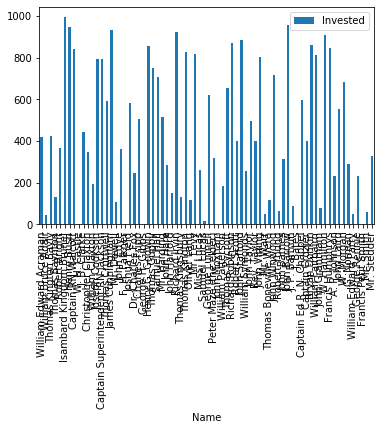

In [35]:
df.plot.bar(x="Name", y="Invested")

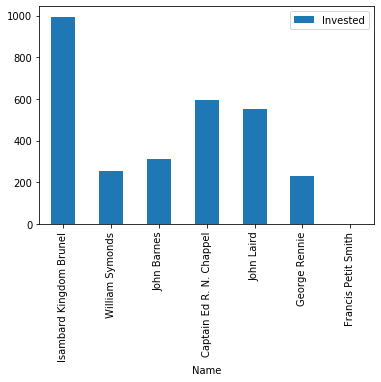

In [36]:
df[ df["Biography"].str.contains("propeller", case=False) ].plot.bar(x="Name", y="Invested")

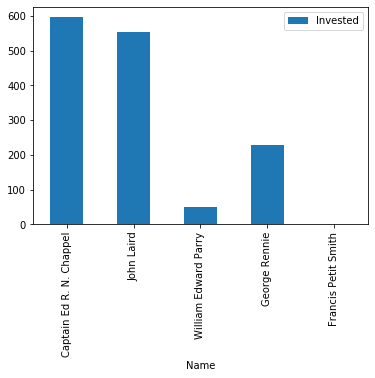

In [37]:
df[ df["Biography"].str.contains("archimedes", case=False) ].plot.bar(x="Name", y="Invested")

In [38]:
df["Invested"].sum()

31522.83

In [39]:
print(df["Invested"].mean())
print(df["Invested"].median())
print(df["Invested"].max())
print(df["Invested"].min())

437.8170833333334
398.975
994.7
0.0


In [40]:
df[ df["Invested"] == df["Invested"].max() ]

,ID,Name,Affiliations,Biography,Invested
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR,Isambard Kingdom Brunel. Consulting engineer ...,994.7


In [41]:
df[ df["Invested"] > df["Invested"].median() ]

,ID,Name,Affiliations,Biography,Invested
0,P8041475,William Edward Acraman,BCC:GWR,"William Edward Acraman. Bristol iron-monger, ...",416.56
2,P5a180b0,Thomas Kington Bayly,NaN,Thomas Kington Bayly. Business Partner and ne...,424.12
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR,Isambard Kingdom Brunel. Consulting engineer ...,994.70
6,Pf6d1fb4,Henry Bush,BCC:GWR,Henry Bush. Member of Bristol merchant family...,948.74
7,P21651e1,Captain RN Walcott,NaN,"Captain Walcott, Royal Navy. Shareholder of G...",841.04
9,Pd2f4d82,J. B. Clarke,NaN,J B Clarke. Shareholder in the Great Western ...,444.89
12,P9585948,Joseph Cookson,BCC,Joseph Cookson. Member of the Bristol Chamber ...,794.56
13,P98d7aec,Captain Superintendent RN Jackson,RN,"Captain Jackson, Royal Navy. Assisted with do...",794.10
14,Pde64423,Thomas Cruttwell,NaN,Thomas Cruttwell. Shareholder in the Great We...,590.84
15,Pe70c23e,James Cunningham,NaN,James Cunningham. Shareholder in the Great Wes...,931.94


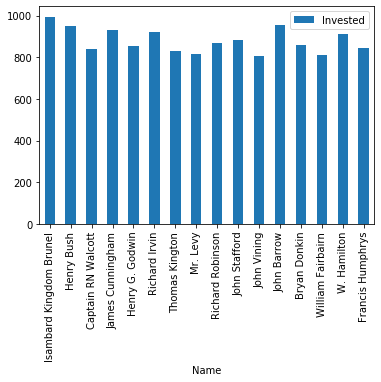

In [42]:
df[ df["Invested"] > 0.8 * df["Invested"].max() ].plot.bar(x="Name", y="Invested")

# Grouping by Category

In [43]:
df.groupby("Affiliations").sum()

,Invested
Affiliations,
B&A:BCC:BDC,621.89
BCC,4500.57
BCC:BDC:GWR,1069.40
BCC:GWR,2388.13
BDC,346.86
BDC:GWR,994.70
GWR,2251.23
RN,2568.99
SMV,192.28


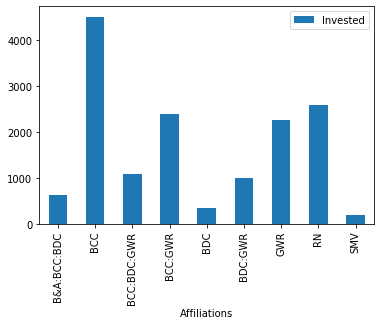

In [44]:
df.groupby("Affiliations").sum().plot.bar()

In [45]:
df[ df["Affiliations"].str.contains("GWR") ]

ValueError: cannot index with vector containing NA / NaN values

In [46]:
df = df.fillna("")

In [47]:
df.head()

,ID,Name,Affiliations,Biography,Invested
0,P8041475,William Edward Acraman,BCC:GWR,"William Edward Acraman. Bristol iron-monger, ...",416.56
1,Pe822a27,William Bruce Adair,,William Bruce Adair. Shareholder in the Great...,43.04
2,P5a180b0,Thomas Kington Bayly,,Thomas Kington Bayly. Business Partner and ne...,424.12
3,P4fe27a3,Thomas Baynton,,Thomas Baynton. Shareholder in the Great Weste...,130.34
4,P1592273,Robert Bright,BCC:GWR,Robert Bright. Member of Bristol merchant fam...,367.96


In [48]:
df[ df["Affiliations"].str.contains("GWR") ]

,ID,Name,Affiliations,Biography,Invested
0,P8041475,William Edward Acraman,BCC:GWR,"William Edward Acraman. Bristol iron-monger, ...",416.56
4,P1592273,Robert Bright,BCC:GWR,Robert Bright. Member of Bristol merchant fam...,367.96
5,Pbb00e87,Isambard Kingdom Brunel,BDC:GWR,Isambard Kingdom Brunel. Consulting engineer ...,994.70
6,Pf6d1fb4,Henry Bush,BCC:GWR,Henry Bush. Member of Bristol merchant family...,948.74
21,P58d164c,Charles Fripp,BCC:GWR,Charles Bowles Fripp. Member of Bristol Chamb...,505.08
22,P88a8ad4,George H. Gibbs,BCC:GWR,George Henry Gibbs. Member of merchant family...,0.00
24,P68252e3,Thomas Guppy,BCC:BDC:GWR,Thomas Guppy. Bristol sugar merchant and manu...,751.96
28,P97842ba,John Harford,BCC:GWR,John Harford. Partner of Philip John Miles in...,149.79
37,P84330a8,Peter Maze (the elder),BCC:BDC:GWR,Peter Maze. Vice President of Bristol Chamber...,317.44
40,P57bda72,Thomas Pycroft,GWR,Thomas Pycroft. Bath-based barrister and shar...,654.93


In [49]:
df[ df["Affiliations"].str.contains("GWR") ]["Invested"].sum()

6703.459999999999

In [50]:
for affiliation in ["B&A", "BCC", "BDC", "GWR", "RN", "SMV"]:
    print(affiliation, df[ df["Affiliations"].str.contains(affiliation) ]["Invested"].sum())

B&A 621.89
BCC 8579.99
BDC 3032.85
GWR 6703.459999999999
RN 2568.9900000000002
SMV 192.28


In [51]:
data = {"Affiliation": [], "Invested": []}

for affiliation in ["B&A", "BCC", "BDC", "GWR", "RN", "SMV"]:
    data["Affiliation"].append(affiliation)
    data["Invested"].append(df[ df["Affiliations"].str.contains(affiliation) ]["Invested"].sum())

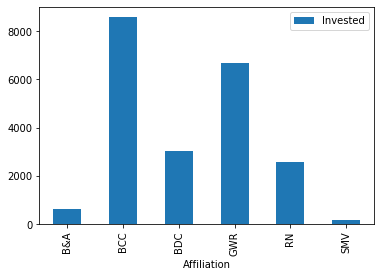

In [53]:
pd.DataFrame(data).plot.bar(x="Affiliation", y="Invested")